In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")


In [3]:
# dropping missing values in job and marital
drop_marital = df[(df['marital'] == 'unknown')].index
drop_job = df[(df['job'] == 'unknown')].index
df.drop(drop_marital)
df.drop(drop_job, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# replacing missing values in housing and loan with mode

mode_job = df['housing'].mode()[0]
df['housing'].fillna(mode_job, inplace=True)

mode_job = df['loan'].mode()[0]
df['loan'].fillna(mode_job, inplace=True)

df

<ipython-input-6-47f0a4b40dec>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing'].fillna(mode_job, inplace=True)
<ipython-input-6-47f0a4b40dec>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
# Compute the upper bound for the column
Q3 = df['duration'].quantile(0.75)
IQR = df['duration'].quantile(0.75) - df['duration'].quantile(0.25)
upper_bound = Q3 + 3*IQR

# Remove outliers
df = df[df['duration'] <= upper_bound]

In [8]:
# using random forest classifier to replace "unknown" values in default

df = pd.read_csv("bank-additional-full.csv", sep=";")

df_known = df[df['default'] != 'unknown']
df_unknown = df[df['default'] == 'unknown']

cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_known[cat_features])
X_train_known_cat = encoder.transform(df_known[cat_features])
X_unknown_cat = encoder.transform(df_unknown[cat_features])

X_train_known = sp.hstack((X_train_known_cat, df_known[num_features].values))
X_unknown = sp.hstack((X_unknown_cat, df_unknown[num_features].values))

y_train = (df_known['default'] == 'yes').astype(int)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_known, y_train)

y_unknown = clf.predict(X_unknown)

df.loc[df['default'] == 'unknown', 'default'] = np.where(y_unknown == 1, 'yes', 'no')

df.shape

(41188, 21)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


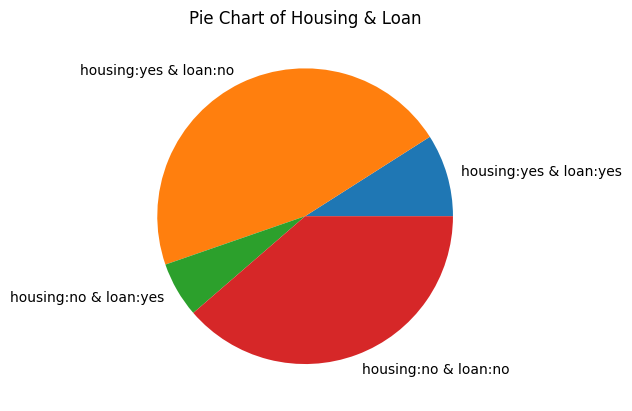

In [11]:
count1 = ((df['housing'] == 'yes') & (df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts()[True]
count2 = ((df['housing'] == 'yes') & (df['loan'] == 'no') & (df['y'] == 'yes')).value_counts()[True]
count3 = ((df['housing'] == 'no') & (df['loan'] == 'yes') & (df['y'] == 'yes')).value_counts()[True]
count4 = ((df['housing'] == 'no') & (df['loan'] == 'no') & (df['y'] == 'yes')).value_counts()[True]

numbers = [count1, count2, count3, count4]
labels = ['housing:yes & loan:yes', 'housing:yes & loan:no', 'housing:no & loan:yes', 'housing:no & loan:no']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Housing & Loan')
plt.show()

# Conclusion: Loan is a bigger deteminer than housing for the customers that subscribe.
# Conclusion: The bank should target customers without loans.

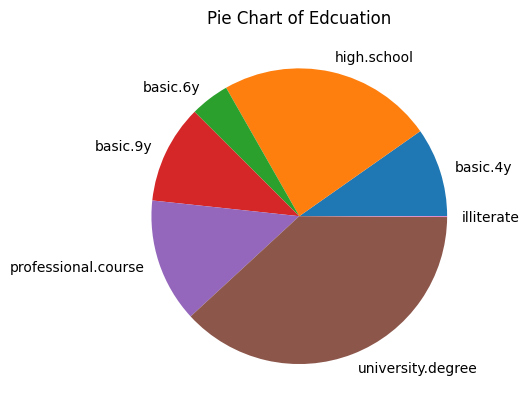

In [12]:
educ = df['education'].unique()

count1 = ((df['education'] == 'basic.4y') & (df['y'] == 'yes')).value_counts()[True]
count2 = ((df['education'] == 'high.school') & (df['y'] == 'yes')).value_counts()[True]
count3 = ((df['education'] == 'basic.6y') & (df['y'] == 'yes')).value_counts()[True]
count4 = ((df['education'] == 'basic.9y') & (df['y'] == 'yes')).value_counts()[True]
count5 = ((df['education'] == 'professional.course') & (df['y'] == 'yes')).value_counts()[True]
count6 = ((df['education'] == 'university.degree') & (df['y'] == 'yes')).value_counts()[True]
count7 = ((df['education'] == 'illiterate') & (df['y'] == 'yes')).value_counts()[True]

numbers = [count1, count2, count3, count4, count5, count6, count7]
labels = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'illiterate']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of Edcuation')
plt.show()

# Conclusion: University Degrees have the most customers that are subscribed.
# Conclusion: The bank should target high school and university degree (intuitively makes sense).

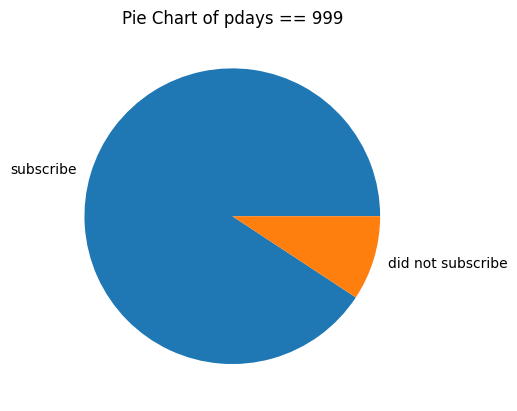

In [13]:
pdays = df['pdays'].unique()
count1 = ((df['pdays'] == 999) & (df['y'] != 'yes')).value_counts()[True]
count2 = ((df['pdays'] == 999) & (df['y'] != 'no')).value_counts()[True]

numbers = [count1, count2]
labels = ['subscribe', 'did not subscribe']
plt.pie(numbers, labels=labels)
plt.title('Pie Chart of pdays == 999')
plt.show()

# Conclusion: Vast majority of customers that have 999 pdays subscribed
# Conclusion: Seems like customers that haven't been contacted are more likely to subscribe

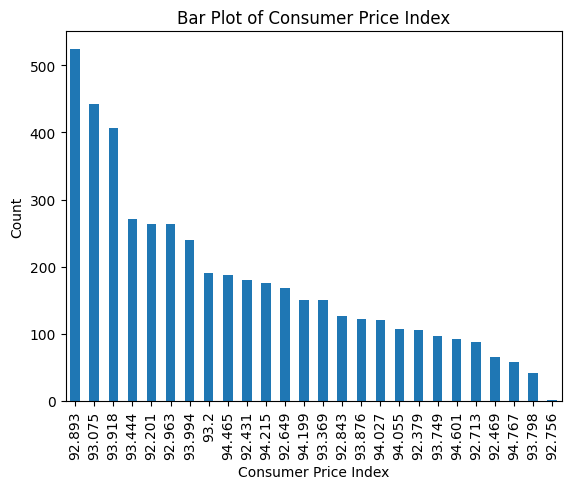

In [14]:
# consumer price index
subscribed_df = df.loc[(df['y'] == 'yes')]
cons_price_idx = subscribed_df['cons.price.idx'].value_counts()
cons_price_idx.plot.bar()
plt.xlabel('Consumer Price Index')
plt.ylabel('Count')
plt.title('Bar Plot of Consumer Price Index')
plt.show()

# Conclusion: Target customers with high CPI (non-volatile trend)

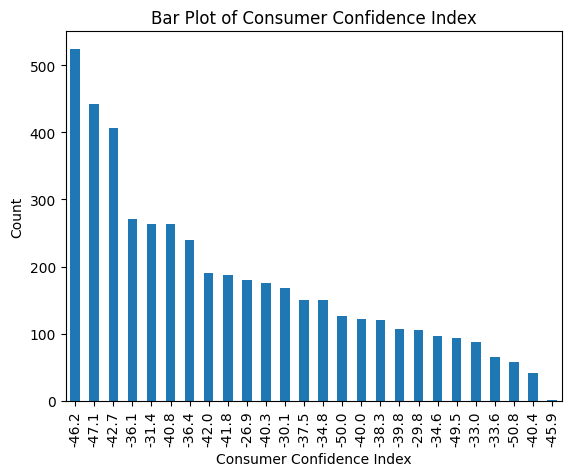

In [15]:
# consumer confidence index
subscribed_df = df.loc[(df['y'] == 'yes')]
cons_conf_idx = subscribed_df['cons.conf.idx'].value_counts()
cons_conf_idx.plot.bar()
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Count')
plt.title('Bar Plot of Consumer Confidence Index')
plt.show()

# Conclusion: Target customers with lower CCI (non-volatile trend)

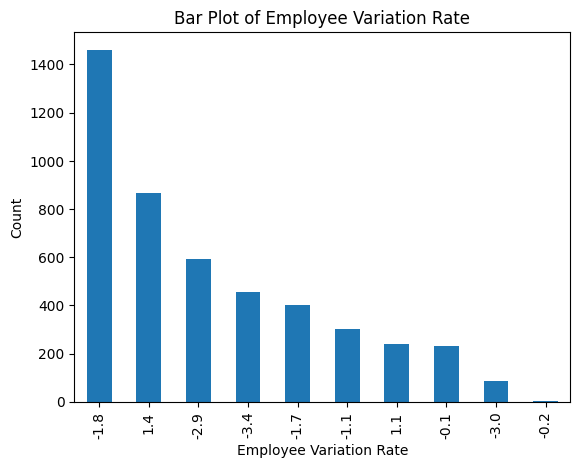

In [16]:
# employee variation rate
subscribed_df = df.loc[(df['y'] == 'yes')]
emp_var_rate = subscribed_df['emp.var.rate'].value_counts()
emp_var_rate.plot.bar()
plt.xlabel('Employee Variation Rate')
plt.ylabel('Count')
plt.title('Bar Plot of Employee Variation Rate')
plt.show()

# Conclusion: Target customers with lower EVR (non-volatile trend)

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder




In [3]:
# Loading the dataset
df = pd.read_csv('cleaned_data.csv')


In [4]:
# Ensuring there are no missing values
df.dropna(inplace=True)

In [5]:
# Separating features (X) and target variable (y)
X = df.drop(columns=['y'])  # Assuming 'y' is the target column
y = df['y']


In [6]:
# Encoding categorical target variable if it is not numeric
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)  # Convert categorical labels to numbers


In [7]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns


In [8]:
# Applying One-Hot Encoding to categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # Convert categorical to numeric


In [9]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [10]:
# Scaling numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [11]:
# Defining model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for classification
              metrics=['accuracy'])


In [13]:
# Training the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_split=0.2,
                    batch_size=32,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])


Epoch 1/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9067 - loss: 0.2366 - val_accuracy: 0.9172 - val_loss: 0.1762
Epoch 2/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9220 - loss: 0.1691 - val_accuracy: 0.9248 - val_loss: 0.1693
Epoch 3/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.1610 - val_accuracy: 0.9248 - val_loss: 0.1704
Epoch 4/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9252 - loss: 0.1602 - val_accuracy: 0.9261 - val_loss: 0.1678
Epoch 5/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9275 - loss: 0.1602 - val_accuracy: 0.9256 - val_loss: 0.1665
Epoch 6/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9266 - loss: 0.1580 - val_accuracy: 0.9230 - val_loss: 0.1724
Epoch 7/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9309 - loss: 0.1509 - val_accuracy: 0.9257 - val_loss: 0.1689
Epoch 8/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9313 - loss: 0.1531 - val_accuracy: 0.

In [14]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9226 - loss: 0.1691
Test accuracy: 0.9238


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions (convert probabilities to binary values)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to 0 or 1

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9238
Precision: 0.6361
Recall: 0.5474
F1 Score: 0.5884

Confusion Matrix:
[[6644  238]
 [ 344  416]]
